In [15]:
# from google.colab import drive
# import sys
# import os
# drive.mount('/content/gdrive')

# sys.path.append('/content/gdrive/My Drive/iss/irs/PracticeModule/data/')
# print("All the system paths:")
# sys.path

# os.chdir('/content/gdrive/My Drive/iss/irs/PracticeModule/data/')
# print("Current working directory:")
# os.getcwd()

# 1. Import Library

In [16]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# from sklearn.decomposition import LatentDirichletAllocation
import spacy
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import manifold, metrics
import numpy as np

# 2. Check Data

In [17]:
# Read data
pd.set_option('display.max_columns', None)

# data = pd.read_excel('./ASD FAQ KB v001.xlsx', sheet_name='FAQ')
data = pd.read_excel('./Shelter Adoption Data.xlsx', sheet_name='Sheet1', engine='openpyxl')

data.head()

,Organisation,Link,Name,Gender,Estimated DOB,Age,Age Category,HDB Approved,Personality
0,Adopt A Dog,https://adoptadog.sg/adopt/view/1463,Adora,Female,NaN,7 yr 9 mth,Adult/Senior,Yes,Adora is an absolute darling to take care of a...
1,Adopt A Dog,https://adoptadog.sg/adopt/view/400,Adore Blessing,Female,NaN,8 yr 6 mth,Adult/Senior,Yes,Generally Adore is brown in color with some pa...
2,Adopt A Dog,https://adoptadog.sg/adopt/view/2037,Ah Boy,Male,NaN,5 yr 6 mth,Adult/Senior,No,Ah Boy is a sweet boy who absolutely loves his...
3,Adopt A Dog,https://adoptadog.sg/adopt/view/255,Ah Leng,Female,NaN,15 yr 8 mth,Adult/Senior,No,Ah Leng was rescued from the far ends of Singa...
4,Adopt A Dog,https://adoptadog.sg/adopt/view/1992,Alaska,Male,NaN,5 yr 8 mth,Adult/Senior,No,Some of you may recall seeing Alaska’s adoptio...


In [18]:
print(data.shape)

(335, 9)


In [19]:
def my_preprocessing(raw_sentence):
    nlp_tool = spacy.load('en_core_web_sm')
    token_sentence = nlp_tool(raw_sentence.lower())
    with open('./irrelevant_words.txt') as file:
        irrelevantlist = [stopword.replace('\n', '').lower() for stopword in file.readlines()]
#     new_sentence = [word for word in token_sentence if word not in irrelevantlist]
    
    preprocessed_sentence = []
    
    for token in token_sentence:
        if token.pos_ == "PUNCT" or token.is_stop == True or token.is_alpha == False or token.pos_ == "SYM":
            continue

        elif token.lemma_ in irrelevantlist or len(token)==1:
            continue
            
        else:
            preprocessed_sentence.append(token.lemma_)
            
    return preprocessed_sentence

In [20]:
personality_description = data.get('Personality')
names = data.get('Name')
corpus = []
final_personality_description = ""
counter = 0
total_words = 0
for individual_description in personality_description:
    preprocessed_description = my_preprocessing(individual_description)
    for name in names:
        name = name.lower()
        name = name.replace(" Blessing","")
        updated_name = name.split()
        if len(updated_name) > 1:
            for token in updated_name:
                while token in preprocessed_description:
                    preprocessed_description.remove(token)
        
        else:
            while updated_name[0] in preprocessed_description:
                preprocessed_description.remove(updated_name[0])
        

    counter += 1
    total_words += len(preprocessed_description)
    print("Description Number: ",counter," Word Count: ",len(preprocessed_description))
    print(preprocessed_description)
    print()
    final_personality_description = ""
    for words in preprocessed_description:
        final_personality_description = final_personality_description + " " + words
    corpus.append(final_personality_description)

print("Total Words Extracted: ",total_words)

Description Number:  1  Word Count:  19
['absolute', 'darling', 'food', 'take', 'medicine', 'food', 'aggression', 'starve', 'point', 'confident', 'trust', 'independent', 'separation', 'anxiety', 'company', 'story', 'able', 'smiley', 'face']

Description Number:  2  Word Count:  14
['tip', 'tiny', 'bit', 'smart', 'unfamiliar', 'pretend', 'calm', 'fine', 'cool', 'pup', 'mesmerize', 'pup', 'puppy', 'inside']

Description Number:  3  Word Count:  12
['sweet', 'absolutely', 'companion', 'hesitate', 'affection', 'gentle', 'giant', 'reactive', 'single', 'training', 'recommend', 'ideally']

Description Number:  4  Word Count:  6
['anxious', 'afraid', 'affection', 'trust', 'wriggle', 'seek']

Description Number:  5  Word Count:  54
['recall', 'post', 'baby', 'display', 'change', 'temperament', 'bitey', 'take', 'poope', 'indoor', 'gorgeous', 'quirk', 'good', 'responsible', 'patient', 'walk', 'till', 'today', 'bumpy', 'ensure', 'quirk', 'remain', 'committed', 'chapter', 'kid', 'elderly', 'walk', 

Description Number:  31  Word Count:  20
['face', 'harsh', 'source', 'fresh', 'water', 'food', 'capture', 'puppy', 'bliss', 'ready', 'basic', 'walk', 'shy', 'puppy', 'average', 'puppy', 'comfortable', 'slow', 'curious', 'bloom']

Description Number:  32  Word Count:  154
['prepared', 'pass', 'aggression', 'lunge', 'kid', 'alert', 'guard', 'post', 'experienced', 'work', 'ensure', 'settle', 'good', 'challenge', 'chewie', 'lick', 'slow', 'trust', 'training', 'chewie', 'sweet', 'affectionate', 'lick', 'face', 'occasionally', 'burrow', 'arm', 'sneak', 'bed', 'snuggle', 'alas', 'chewie', 'comfortable', 'display', 'behavioural', 'problem', 'door', 'slight', 'sound', 'door', 'unlock', 'worry', 'burglar', 'hypervigilance', 'extend', 'walk', 'difficult', 'blindspot', 'tight', 'flavour', 'lunge', 'drag', 'foot', 'slow', 'move', 'elderly', 'toddler', 'unfamiliar', 'work', 'closely', 'trainer', 'behavioural', 'problem', 'fast', 'later', 'chewie', 'tremendously', 'calm', 'occasional', 'uncontrollabl

Description Number:  58  Word Count:  6
['good', 'take', 'warm', 'charming', 'handsome', 'puppy']

Description Number:  59  Word Count:  28
['playful', 'friendly', 'makeup', 'artist', 'past', 'amazing', 'eyebrow', 'friendly', 'stand', 'arrive', 'playful', 'charming', 'worm', 'tick', 'fever', 'medication', 'common', 'bounce', 'pretty', 'quick', 'easy', 'pleaser', 'pay', 'attention', 'wait', 'unique', 'gorgeous', 'possible']

Description Number:  60  Word Count:  16
['cemetary', 'complaint', 'bite', 'hike', 'sterilize', 'pack', 'fearful', 'run', 'away', 'suspect', 'protect', 'territory', 'intruder', 'heartworm', 'slowly', 'comfortable']

Description Number:  61  Word Count:  25
['friendly', 'immediately', 'take', 'moment', 'arrive', 'baby', 'jurong', 'island', 'take', 'staff', 'comfortable', 'enjoy', 'walk', 'excitement', 'eagerness', 'hard', 'leash', 'firm', 'teach', 'walk', 'nicely', 'calmly', 'expect', 'great', 'companion']

Description Number:  62  Word Count:  22
['playful', 'energe

Description Number:  91  Word Count:  14
['big', 'baby', 'play', 'rough', 'jump', 'good', 'welcome', 'recognise', 'loud', 'kranji', 'coffee', 'shop', 'pest', 'control']

Description Number:  92  Word Count:  16
['friendly', 'affectionate', 'loyal', 'protective', 'attention', 'motivated', 'alpha', 'actively', 'use', 'away', 'affection', 'walk', 'challenge', 'walk', 'ideally', 'firm']

Description Number:  93  Word Count:  17
['stoic', 'brave', 'independent', 'good', 'protect', 'pretty', 'independent', 'curl', 'share', 'walk', 'confident', 'theirs', 'truly', 'story', 'friendship', 'good', 'world']

Description Number:  94  Word Count:  19
['shy', 'friendly', 'nervous', 'sweet', 'shy', 'confident', 'beau', 'changi', 'bit', 'scared', 'world', 'enjoy', 'walk', 'swimming', 'shiny', 'big', 'endear', 'smile', 'confidence']

Description Number:  95  Word Count:  20
['creamy', 'golden', 'pup', 'little', 'charmer', 'friendly', 'playful', 'pup', 'play', 'ready', 'willing', 'smother', 'affection', 

Description Number:  121  Word Count:  19
['reserve', 'sweet', 'curious', 'bachelor', 'move', 'sweet', 'shy', 'entire', 'share', 'mum', 'big', 'realise', 'underneath', 'big', 'shy', 'puppy', 'kind', 'big', 'walk']

Description Number:  122  Word Count:  16
['gentle', 'chill', 'good', 'warm', 'friendly', 'face', 'gentle', 'calm', 'good', 'ride', 'confidence', 'easily', 'walk', 'patient', 'young', 'kid']

Description Number:  123  Word Count:  33
['wander', 'aimlessly', 'toa', 'payoh', 'save', 'authority', 'loom', 'lasso', 'ready', 'capture', 'kind', 'scoop', 'hesitation', 'run', 'irresponsible', 'dirty', 'bite', 'bug', 'cause', 'problem', 'cite', 'oh', 'disease', 'bite', 'bug', 'cure', 'world', 'alright', 'shall', 'nap', 'imply', 'total', 'sweet']

Description Number:  124  Word Count:  14
['sweet', 'postive', 'base', 'training', 'scared', 'big', 'wide', 'world', 'good', 'slowly', 'gently', 'interact', 'specialized', 'training']

Description Number:  125  Word Count:  55
['cartoon', 'co

Description Number:  146  Word Count:  17
['nervous', 'quiet', 'shy', 'spend', 'sweet', 'quiet', 'reserved', 'character', 'enjoy', 'hang', 'confidence', 'comfort', 'outside', 'walk', 'whine', 'excitement', 'leash']

Description Number:  147  Word Count:  17
['cute', 'little', 'puppy', 'aggression', 'settle', 'little', 'fearful', 'insecure', 'pant', 'sweet', 'little', 'underneath', 'stick', 'comfort', 'sit', 'enclosure', 'trust']

Description Number:  148  Word Count:  23
['passionate', 'active', 'enjoy', 'outside', 'walk', 'run', 'rough', 'wrestling', 'constantly', 'ask', 'affection', 'enjoy', 'good', 'belly', 'rub', 'roll', 'ask', 'strong', 'leash', 'good', 'experienced', 'active', 'lifestyle']

Description Number:  149  Word Count:  11
['charming', 'sweet', 'friendly', 'move', 'cheerful', 'resilient', 'living', 'beautiful', 'stop', 'visitor', 'track']

Description Number:  150  Word Count:  5
['sweet', 'friendly', 'affection', 'attention', 'suited']

Description Number:  151  Word Co

Description Number:  194  Word Count:  16
['sweet', 'natured', 'little', 'shy', 'gentle', 'slowly', 'endearing', 'companion', 'trust', 'walk', 'leash', 'regular', 'assurance', 'suited', 'patient', 'confidence']

Description Number:  195  Word Count:  6
['lovable', 'obedient', 'waggy', 'unfamiliar', 'face', 'warm']

Description Number:  196  Word Count:  7
['shy', 'take', 'warm', 'affectionate', 'food', 'motivate', 'good']

Description Number:  197  Word Count:  8
['friendly', 'intelligent', 'food', 'motivated', 'basic', 'sit', 'walk', 'leash']

Description Number:  198  Word Count:  8
['effervescent', 'excitable', 'friendly', 'excited', 'enjoy', 'walk', 'guide', 'leash']

Description Number:  199  Word Count:  10
['quiet', 'super', 'sweet', 'little', 'shy', 'good', 'food', 'motivate', 'walk', 'leash']

Description Number:  200  Word Count:  14
['shy', 'warm', 'confident', 'gentle', 'confidence', 'work', 'walk', 'great', 'multi', 'protection', 'guidance', 'young', 'child', 'ideal']

Des

Description Number:  239  Word Count:  16
['term', 'overly', 'friendly', 'face', 'enthusiastically', 'jump', 'hate', 'dependent', 'type', 'character', 'walk', 'leash', 'listen', 'scold', 'business', 'walk']

Description Number:  240  Word Count:  6
['confident', 'dare', 'fast', 'observant', 'balanced', 'stable']

Description Number:  241  Word Count:  9
['settle', 'pretty', 'quickly', 'sweet', 'pair', 'big', 'big', 'standing', 'eat']

Description Number:  242  Word Count:  6
['loyal', 'ride', 'swim', 'beach', 'affectionate', 'hug']

Description Number:  243  Word Count:  22
['fish', 'emaciate', 'small', 'food', 'water', 'provide', 'deny', 'say', 'fish', 'food', 'gobble', 'immediately', 'ask', 'away', 'agree', 'fearful', 'social', 'till', 'protective', 'food', 'starve', 'long']

Description Number:  244  Word Count:  1
['puppy']

Description Number:  245  Word Count:  14
['afraid', 'uncertainty', 'disappear', 'fearless', 'play', 'eat', 'adult', 'freely', 'walk', 'sniff', 'friendly', 'go

Description Number:  287  Word Count:  20
['quiet', 'independent', 'gentle', 'shy', 'aggression', 'observe', 'timid', 'lovely', 'shy', 'little', 'mth', 'baby', 'adapt', 'world', 'work', 'display', 'sign', 'aggression', 'blossom', 'tender']

Description Number:  288  Word Count:  24
['quiet', 'independent', 'inquisitive', 'outdoors', 'walk', 'leash', 'timid', 'observant', 'jordan', 'food', 'motivate', 'independent', 'quietly', 'play', 'fill', 'jordan', 'observe', 'surrounding', 'quietly', 'curiously', 'outdoor', 'leash', 'training', 'work']

Description Number:  289  Word Count:  34
['sign', 'aggression', 'sweet', 'natured', 'training', 'boarding', 'share', 'condition', 'boarding', 'good', 'living', 'condition', 'furry', 'baby', 'provide', 'typically', 'high', 'survival', 'instinct', 'escape', 'artist', 'alertness', 'leash', 'leash', 'training', 'break', 'leash', 'escape', 'show', 'aggression', 'sweet', 'temperament', 'confident', 'excel']

Description Number:  290  Word Count:  34
['si

Description Number:  320  Word Count:  19
['stand', 'outside', 'enclosure', 'lunge', 'enter', 'clean', 'enclosure', 'food', 'glow', 'bit', 'enjoy', 'twice', 'walk', 'scratch', 'greedy', 'long', 'slow', 'work', 'comfortable']

Description Number:  321  Word Count:  58
['sweet', 'puppy', 'bond', 'previous', 'take', 'great', 'change', 'happen', 'maybe', 'trigger', 'anxiety', 'guarding', 'ferociously', 'outdoors', 'boisterous', 'friendly', 'difficult', 'spot', 'uncomfortable', 'display', 'sign', 'anxiety', 'afraid', 'food', 'environmental', 'control', 'anxiety', 'guard', 'great', 'companion', 'food', 'motivated', 'game', 'fetch', 'enjoy', 'long', 'walk', 'friendly', 'excitement', 'sniff', 'initiate', 'play', 'independent', 'challenge', 'perfect', 'training', 'proper', 'able', 'settle', 'comfortably', 'take', 'consistency', 'anxiety', 'guard', 'idea', 'willing', 'walk', 'child']

Description Number:  322  Word Count:  10
['shy', 'take', 'observe', 'quietly', 'slowly', 'okay', 'meal', 'hopef

In [22]:
vectorizer = CountVectorizer()
word_vec = vectorizer.fit_transform(corpus)
print(word_vec.toarray())
print(vectorizer.get_feature_names())
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(word_vec)
tfidf_matrix = tfidf.toarray()
print(tfidf_matrix)
tsne = manifold.TSNE(n_components=2, perplexity=20.0, early_exaggeration=12.0,
                    learning_rate = 200.0, n_iter=1000, init='pca', random_state=0)
tsne_tfidf_matrix = tsne.fit_transform(tfidf_matrix)
print(tsne_tfidf_matrix)

[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['abandonment', 'abit', 'able', 'abnormal', 'abnormality', 'absolute', 'absolutely', 'abuse', 'accept', 'accident', 'accidental', 'accordingly', 'act', 'action', 'active', 'actively', 'acupuncture', 'adapt', 'adjust', 'administer', 'admirably', 'adoptive', 'adorable', 'adult', 'adventure', 'adventurous', 'affection', 'affectionate', 'affectionately', 'affirm', 'afraid', 'aggression', 'aggressive', 'aggressively', 'agile', 'agree', 'ahead', 'aid', 'aimlessly', 'air', 'alas', 'aleck', 'alert', 'alertness', 'alfa', 'alike', 'allegedly', 'allergysharpei', 'alleviate', 'alongside', 'aloof', 'alpha', 'alright', 'amazing', 'ang', 'angel', 'animal', 'answer', 'anxiety', 'anxious', 'anytime', 'apartment', 'appeal', 'appear', 'appetite', 'apply', 'appreciate', 'apprehension', 'apprehensive', 'approx', 'aptly', 'arise', 'arm', 'arrival', 'arrive', 'artist', 'ash', 'ask', 'aspira

/home/jonathan/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/jonathan/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[[-1.02139549e+01 -4.52338123e+00]
 [-9.88671684e+00  1.25250778e+01]
 [ 2.39903660e+01  2.12757707e+00]
 [ 2.05528603e+01 -1.88153005e+00]
 [-3.24721456e+00  4.34182978e+00]
 [-4.45839405e+00  2.17847691e+01]
 [-3.10749578e+00 -1.06537857e+01]
 [ 9.37693405e+00 -1.76672630e+01]
 [-7.26131392e+00 -1.78924046e+01]
 [ 3.71673918e+00  7.36995268e+00]
 [-1.20659375e+00  1.53901539e+01]
 [-1.73611126e+01  6.53789425e+00]
 [ 1.84847927e+01  9.94066429e+00]
 [ 3.31803679e+00  1.10665426e+01]
 [ 8.98692131e+00  4.68354654e+00]
 [-1.20603552e+01  1.10721159e+01]
 [ 1.16769800e+01  1.31210499e+01]
 [-1.16814957e+01 -1.97891045e+01]
 [ 1.62945747e+01  2.60618973e+01]
 [ 7.73376274e+00  6.29874277e+00]
 [ 1.81030064e+01  1.06775198e+01]
 [ 5.22282362e-01 -9.20790577e+00]
 [ 1.26973696e+01 -1.39815035e+01]
 [ 2.56958447e+01 -1.25321875e+01]
 [ 3.27801418e+00  2.67269783e+01]
 [-1.07308798e+01 -1.02719822e+01]
 [-1.55243766e+00 -1.93083775e+00]
 [-2.71177273e+01 -5.13121080e+00]
 [ 2.07998714e+01  5

In [23]:
# print(tfidf_matrix)
from HopkinsTest import hopkins
# A score around 0.5 express no clusterability
# A score tending to 0 express a high cluster tendency

print('Hopkins Test: ',hopkins(tfidf_matrix,10))

Hopkins Test:  0.143797861198137


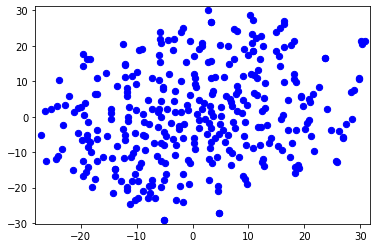

In [24]:
plt.figure()
plt.scatter(tsne_tfidf_matrix[:,0],tsne_tfidf_matrix[:,1],color='blue',s=40,marker='o')
x_min = tsne_tfidf_matrix[:,0].min() - 1
x_max = tsne_tfidf_matrix[:,0].max() + 1
y_min = tsne_tfidf_matrix[:,1].min() - 1
y_max = tsne_tfidf_matrix[:,1].max() + 1
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

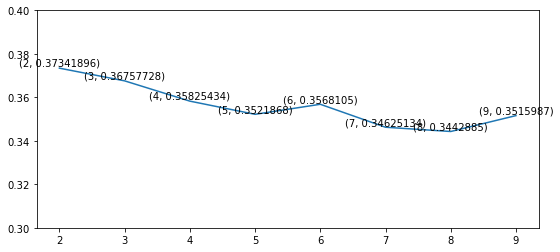

In [30]:
scores = []
for num in np.arange(2,10):
    cluster = KMeans(n_clusters = num, max_iter=300, n_init=10, init='k-means++', random_state = 42)
    cluster.fit(tsne_tfidf_matrix)
    score = metrics.silhouette_score(tsne_tfidf_matrix, cluster.labels_, metric='euclidean', sample_size=len(tsne_tfidf_matrix))
    scores.append(score)

fig = plt.figure(figsize=(9, 4))
plt.plot(np.arange(2, 10), scores)
plt.ylim(0.3, 0.4)
for a,b in zip(np.arange(2,10), scores):
    plt.text(a,b,(a,b), ha='center', va='bottom', fontsize=10);
plt.savefig('Silhouette Score.jpg')
plt.show()

No Clusters = 2 Silhouette =  0.37341896
No Clusters = 3 Silhouette =  0.36757728
No Clusters = 4 Silhouette =  0.35825437
No Clusters = 5 Silhouette =  0.35218677
No Clusters = 6 Silhouette =  0.35681048
No Clusters = 7 Silhouette =  0.34625134
No Clusters = 8 Silhouette =  0.34428847
No Clusters = 9 Silhouette =  0.3515987


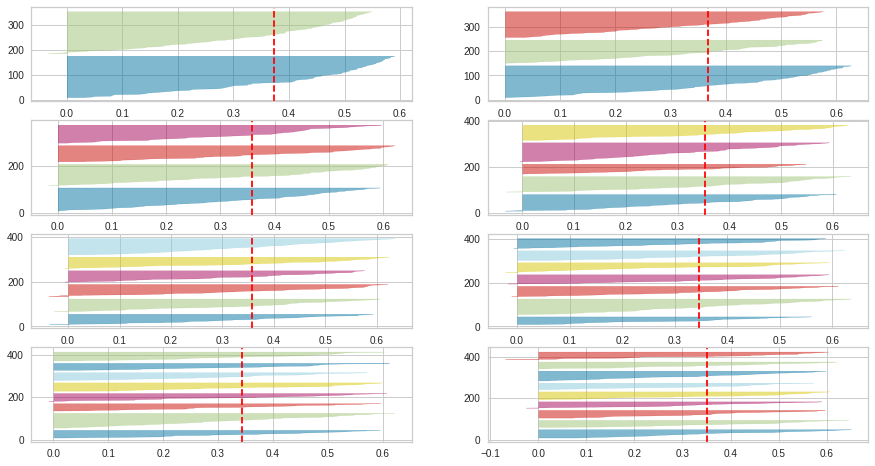

In [58]:
from yellowbrick.cluster import InterclusterDistance, KElbowVisualizer, SilhouetteVisualizer

n_clust = 9

nrw = int(n_clust/2)-1
fig, ax = plt.subplots(4,2,figsize=(15,8))

for i in range(2, n_clust+1):
    km = KMeans(n_clusters=i, random_state = 42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(tsne_tfidf_matrix)
    print("No Clusters =", i, "Silhouette = ", visualizer.silhouette_score_)
    

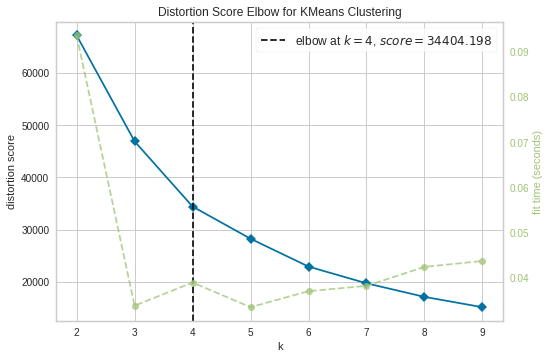

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [59]:
n_clust = 9

# nrw = int(n_clust/2)-1
# fig, ax = plt.subplots(3,2,figsize=(15,8))
model = KMeans(n_clusters=n_clust, init="k-means++",n_init=10,max_iter=100,random_state=42)
visualizer=KElbowVisualizer(model, k=(2, n_clust+1))

visualizer.fit(tsne_tfidf_matrix)
visualizer.show()

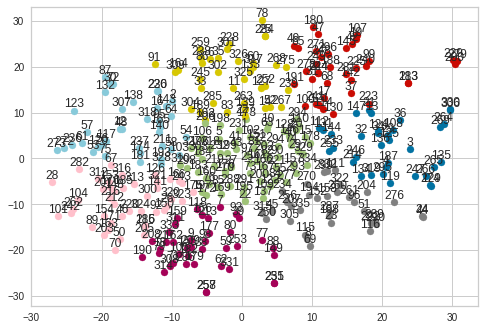

In [67]:
n_clusters = 8
km_cluster = KMeans(n_clusters, init= 'k-means++',random_state = 42).fit(tsne_tfidf_matrix)
labels = km_cluster.labels_
# cluster_name = ["Cluster"+str(i) for i in set(labels)]
# labels = km_cluster.fit_predict(tsne_tfidf_matrix)
# markers = ['^','o','s','*','D','1']
colors = ['r','g','b','y','m','c','grey','pink']
id = 1
# print(labels)

# for i, txt in enumerate(cluster_name):
#     plt.scatter(tsne_tfidf_matrix[i,0], tsne_tfidf_matrix[i,1],cmap='Set3')
#     plt.text(tsne_tfidf_matrix[i, 0], tsne_tfidf_matrix[i,1]+0.1, id, ha='center',va='bottom',fontsize=12)

for i in range(len(labels)):
    plt.scatter(tsne_tfidf_matrix[i,0], tsne_tfidf_matrix[i,1],cmap='Set3', c=colors[labels[i]])
    plt.text(tsne_tfidf_matrix[i, 0], tsne_tfidf_matrix[i,1]+0.1, id, ha='center',va='bottom',fontsize=12)
    id += 1
plt.show()

In [68]:
orgs = data.get('Organisation')
personality_description = data.get('Personality')
names = data.get('Name')
gender = data.get('Gender')
hdb_approval = data.get('HDB Approved')
age_cat = data.get('Age Category')

pandaframe_1 = []
row_1 = []
row_1_count = 0

pandaframe_2 = []
row_2 = []
row_2_count = 0

pandaframe_3 = []
row_3 = []
row_3_count = 0

pandaframe_3 = []
row_3 = []
row_3_count = 0

pandaframe_4 = []
row_4 = []
row_4_count = 0

pandaframe_5 = []
row_5 = []
row_5_count = 0

pandaframe_6 = []
row_6 = []
row_6_count = 0

pandaframe_7 = []
row_7 = []
row_7_count = 0

pandaframe_8 = []
row_8 = []
row_8_count = 0

pandaframe_9 = []
row_9 = []
row_9_count = 0

for i in range(len(labels)):      
    if labels[i] == 0:
        pandaframe_1.append([orgs[i], names[i], gender[i], age_cat[i], hdb_approval[i], personality_description[i]])
        row_1_count += 1
        row_1.append(row_1_count)

    if labels[i] == 1:
        pandaframe_2.append([orgs[i], names[i], gender[i], age_cat[i], hdb_approval[i], personality_description[i]])      
        row_2_count += 1
        row_2.append(row_2_count)

    if labels[i] == 2:
        pandaframe_3.append([orgs[i], names[i], gender[i], age_cat[i], hdb_approval[i], personality_description[i]])      
        row_3_count += 1
        row_3.append(row_3_count)
    
    if labels[i] == 3:
        pandaframe_4.append([orgs[i], names[i], gender[i], age_cat[i], hdb_approval[i], personality_description[i]])      
        row_4_count += 1
        row_4.append(row_4_count)
        
    if labels[i] == 4:
        pandaframe_5.append([orgs[i], names[i], gender[i], age_cat[i], hdb_approval[i], personality_description[i]])      
        row_5_count += 1
        row_5.append(row_5_count)
        
    if labels[i] == 5:
        pandaframe_6.append([orgs[i], names[i], gender[i], age_cat[i], hdb_approval[i], personality_description[i]])      
        row_6_count += 1
        row_6.append(row_6_count)
        
    if labels[i] == 6:
        pandaframe_7.append([orgs[i], names[i], gender[i], age_cat[i], hdb_approval[i], personality_description[i]])      
        row_7_count += 1
        row_7.append(row_7_count)
    
    if labels[i] == 7:
        pandaframe_8.append([orgs[i], names[i], gender[i], age_cat[i], hdb_approval[i], personality_description[i]])      
        row_8_count += 1
        row_8.append(row_8_count)
        
    if labels[i] == 8:
        pandaframe_9.append([orgs[i], names[i], gender[i], age_cat[i], hdb_approval[i], personality_description[i]])      
        row_9_count += 1
        row_9.append(row_9_count)

df1 = pd.DataFrame(pandaframe_1,index=row_1,columns=['Organisation','Name','Gender','Age Category','HDB Approval','Personality']) 
df2 = pd.DataFrame(pandaframe_2,index=row_2,columns=['Organisation','Name','Gender','Age Category','HDB Approval','Personality']) 
df3 = pd.DataFrame(pandaframe_3,index=row_3,columns=['Organisation','Name','Gender','Age Category','HDB Approval','Personality']) 
df4 = pd.DataFrame(pandaframe_4,index=row_4,columns=['Organisation','Name','Gender','Age Category','HDB Approval','Personality']) 
df5 = pd.DataFrame(pandaframe_5,index=row_5,columns=['Organisation','Name','Gender','Age Category','HDB Approval','Personality'])
df6 = pd.DataFrame(pandaframe_6,index=row_6,columns=['Organisation','Name','Gender','Age Category','HDB Approval','Personality']) 
df7 = pd.DataFrame(pandaframe_7,index=row_7,columns=['Organisation','Name','Gender','Age Category','HDB Approval','Personality'])
df8 = pd.DataFrame(pandaframe_8,index=row_8,columns=['Organisation','Name','Gender','Age Category','HDB Approval','Personality'])
df9 = pd.DataFrame(pandaframe_9,index=row_9,columns=['Organisation','Name','Gender','Age Category','HDB Approval','Personality'])

with pd.ExcelWriter('n_clusters_{}.xlsx'.format(n_clusters)) as writer:
    df1.to_excel(writer, sheet_name = "Cluster 1")
    df2.to_excel(writer, sheet_name = "Cluster 2")
    df3.to_excel(writer, sheet_name = "Cluster 3")
    df4.to_excel(writer, sheet_name = "Cluster 4")
    df5.to_excel(writer, sheet_name = "Cluster 5")
    df6.to_excel(writer, sheet_name = "Cluster 6")
    df7.to_excel(writer, sheet_name = "Cluster 7")
    df8.to_excel(writer, sheet_name = "Cluster 8")
    df9.to_excel(writer, sheet_name = "Cluster 9")
    